In [218]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [219]:
# Importing Batting URLs
print(ls.Team_Pitching_2024_url)
print(ls.Team_Pitching_2007_url)

https://www.baseball-reference.com/teams/COL/2024.shtml#team_pitching
https://www.baseball-reference.com/teams/COL/2007.shtml#team_pitching


In [220]:
# Defining a function to pull information from batting tables into a pandas dataframe.

def get_pitching_table(x,y):
    """
    Retrieves and parses an HTML table from a specified URL.

    Parameters:
    - x (str): URL of the webpage containing the HTML table.
    - y (str): ID of the HTML table to be extracted from the webpage.

    Returns:
    - df (pandas dataframe): Cleaned and processed DataFrame containing numeric data from the 
        specified HTML table.
    
    This function performs the following steps:
    1. Sends a GET request to the provided URL.
    2. Parses the HTML content using BeautifulSoup.
    3. Finds the table element with the specified ID.
    4. Converts the HTML table into a pandas DataFrame using pd.read_html().
    5. Converts numeric columns (excluding 'Pos' and 'Name') to numeric type.
    6. Drops rows with any NaN values.
    7. Returns the cleaned DataFrame.
    """

    
    # Finding the table with the specified url (x) and id (y)
    response=requests.get(x)
    soup= BeautifulSoup(response.content, 'html.parser')
    s = soup.find("table",id=y)

    # Converting html to a pandas dataframe
    df = pd.read_html(str(s))[0]
    
    # Convert columns to numeric type, ignoring Position (POS) and Name (Name) which should remain strings. 
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Returning the df created for use outside of the function.
    return df


In [221]:
# Using the get_batting_table function to pull in the batting table from the Links (ls) file.

pitching_2007= get_pitching_table(ls.Team_Pitching_2007_url,"team_pitching")
pitching_2024= get_pitching_table(ls.Team_Pitching_2024_url,"team_pitching")


C:\Users\elcoo\AppData\Local\Temp\ipykernel_11212\4114799816.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]
C:\Users\elcoo\AppData\Local\Temp\ipykernel_11212\4114799816.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]


In [222]:
# FILTER rows to include only starting pitchers (Pos = SP)
pitching_2007_filter = pitching_2007[pitching_2007['Pos'].isin(['SP', 'CL', 'RP'])]
pitching_2024_filter = pitching_2024[pitching_2024['Pos'].isin(['SP', 'CL', 'RP'])]

pitching_2007_pos = pd.DataFrame(pitching_2007_filter)
pitching_2024_pos = pd.DataFrame(pitching_2024_filter)

# display starting pitcher rosters per each year
display(pitching_2007_pos.head(20))
display(pitching_2024_pos.head(20))

,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1.0,SP,Jeff Francis*,26.0,17.0,9.0,0.654,4.22,34.0,34.0,...,1.0,922.0,114.0,4.19,1.379,9.8,1.0,2.6,6.9,2.62
1,2.0,SP,Aaron Cook,28.0,8.0,7.0,0.533,4.12,25.0,25.0,...,0.0,698.0,117.0,4.58,1.337,9.7,0.8,2.4,3.3,1.39
2,3.0,SP,Josh Fogg,30.0,10.0,9.0,0.526,4.94,30.0,29.0,...,3.0,745.0,97.0,5.21,1.527,10.5,1.2,3.2,5.1,1.59
3,4.0,SP,Jason Hirsh,25.0,5.0,7.0,0.417,4.81,19.0,19.0,...,5.0,483.0,100.0,5.32,1.344,8.3,1.4,3.8,6.0,1.56
4,5.0,SP,Ubaldo Jiménez,23.0,4.0,4.0,0.500,4.28,15.0,15.0,...,3.0,354.0,112.0,4.74,1.305,7.7,1.1,4.1,7.5,1.84
5,6.0,SP,Rodrigo López,31.0,5.0,4.0,0.556,4.42,14.0,14.0,...,0.0,333.0,109.0,4.75,1.311,9.4,1.2,2.4,4.9,2.05
7,7.0,CL,Brian Fuentes*,31.0,3.0,5.0,0.375,3.08,64.0,0.0,...,2.0,255.0,156.0,4.15,1.125,6.8,0.9,3.4,8.2,2.43
8,8.0,RP,Manny Corpas,24.0,4.0,2.0,0.667,2.08,78.0,0.0,...,0.0,306.0,232.0,3.60,1.064,7.3,0.7,2.3,6.7,2.90
9,9.0,RP,Jeremy Affeldt*,28.0,4.0,3.0,0.571,3.51,75.0,0.0,...,6.0,253.0,137.0,4.17,1.356,7.2,0.5,5.0,7.0,1.39
10,10.0,RP,LaTroy Hawkins,34.0,2.0,5.0,0.286,3.42,62.0,0.0,...,2.0,225.0,141.0,4.47,1.229,8.5,1.0,2.6,4.7,1.81


,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1.0,SP,Ryan Feltner,27.0,1.0,10.0,0.091,5.19,20.0,20.0,...,2.0,475.0,87.0,4.09,1.418,10.0,1.2,2.8,8.0,2.85
1,2.0,SP,Cal Quantrill,29.0,6.0,7.0,0.462,4.15,20.0,20.0,...,4.0,460.0,109.0,4.66,1.338,8.6,1.2,3.4,6.9,2.02
2,3.0,SP,Austin Gomber*,30.0,2.0,6.0,0.250,4.61,18.0,18.0,...,3.0,417.0,98.0,4.91,1.304,9.5,1.6,2.3,6.1,2.68
3,4.0,SP,Dakota Hudson,29.0,2.0,12.0,0.143,5.84,17.0,17.0,...,3.0,391.0,77.0,5.32,1.645,10.0,1.0,4.8,5.0,1.04
4,5.0,SP,Ty Blach*,33.0,3.0,5.0,0.375,5.46,16.0,9.0,...,1.0,268.0,83.0,5.13,1.584,12.3,1.5,2.0,4.9,2.46
5,6.0,SP,Kyle Freeland*,31.0,2.0,3.0,0.400,5.63,9.0,9.0,...,1.0,214.0,81.0,4.30,1.542,11.3,1.1,2.6,6.4,2.43
7,7.0,CL,Jalen Beeks*,30.0,6.0,4.0,0.600,4.66,44.0,0.0,...,5.0,206.0,97.0,4.11,1.324,8.6,0.9,3.4,7.1,2.11
8,8.0,RP,Victor Vodnik,24.0,2.0,1.0,0.667,3.96,43.0,0.0,...,4.0,226.0,115.0,3.94,1.414,8.8,0.9,4.0,8.3,2.09
9,9.0,RP,Nick Mears,27.0,1.0,4.0,0.200,5.68,40.0,0.0,...,3.0,200.0,80.0,2.64,1.534,9.5,0.4,4.3,11.4,2.67
10,10.0,RP,Tyler Kinley,33.0,4.0,1.0,0.800,7.34,44.0,0.0,...,2.0,198.0,62.0,5.65,1.776,10.8,1.9,5.2,9.5,1.83


Text(0.5, 1.0, 'Win-Loss Percentage, 2024 Rockies')

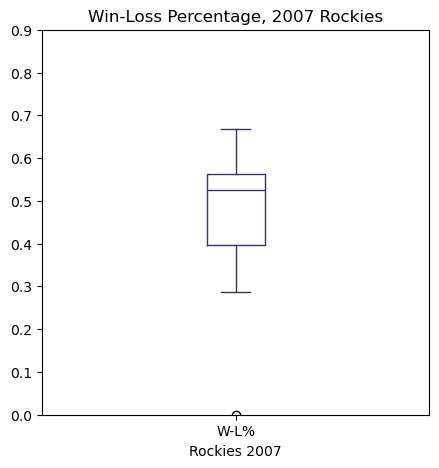

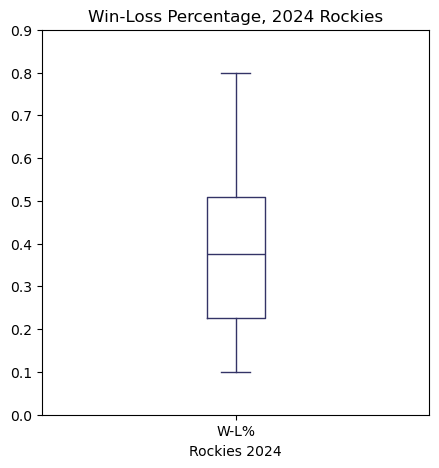

In [223]:
#create box plot to compare median win-loss averages for both 2007 and 2024 seasons

#2007 season box plot
pitching_WL_fig1 = pitching_2007_SP.plot(kind='box', y='W-L%', color=ls.Rockies_Purple_Hex, figsize=[5,5])
pitching_WL_fig1.set_xlabel('Rockies 2007')
plt.ylim(0, 0.9)
pitching_WL_fig1.set_title("Win-Loss Percentage, 2007 Rockies")

#2024 season box plot
pitching_WL_fig2 = pitching_2024_SP.plot(kind='box', y='W-L%', color=ls.Rockies_Purple_Hex, figsize=[5,5])
pitching_WL_fig2.set_xlabel('Rockies 2024')
plt.ylim(0, 0.9)
pitching_WL_fig2.set_title("Win-Loss Percentage, 2024 Rockies")

[Text(0, 0, 'Jeff Francis*'),
 Text(1, 0, 'Aaron Cook'),
 Text(2, 0, 'Josh Fogg'),
 Text(3, 0, 'Jason Hirsh'),
 Text(4, 0, 'Ubaldo Jiménez'),
 Text(5, 0, 'Rodrigo López'),
 Text(6, 0, 'Brian Fuentes*'),
 Text(7, 0, 'Manny Corpas'),
 Text(8, 0, 'Jeremy Affeldt*'),
 Text(9, 0, 'LaTroy Hawkins'),
 Text(10, 0, 'Jorge Julio')]

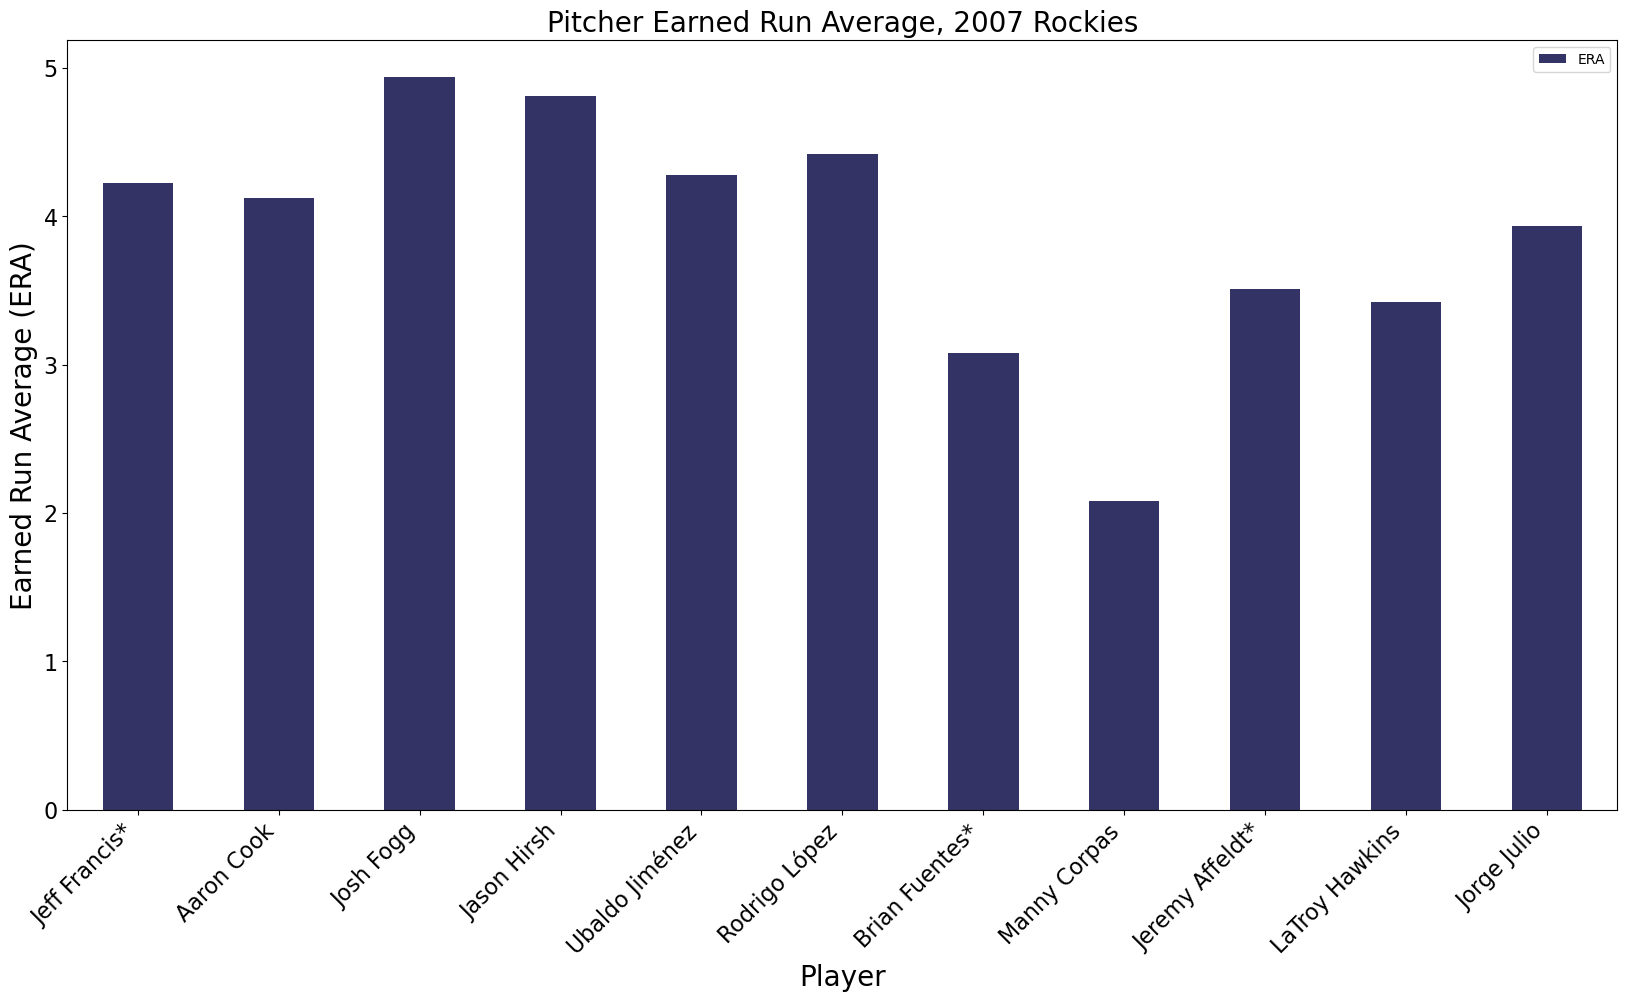

In [224]:
# Plotting the '07 pitching data in a bar chart to view players and their on ERA scores.
pitching_ERA_fig1=pitching_2007_SP.plot(x="Name",
                  y="ERA",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_ERA_fig1.set_ylabel('Earned Run Average (ERA)', fontsize=20)
pitching_ERA_fig1.set_xlabel('Player', fontsize=20,)
pitching_ERA_fig1.set_title("Pitcher Earned Run Average, 2007 Rockies", fontsize=20)
pitching_ERA_fig1.set_xticklabels(pitching_ERA_fig1.get_xticklabels(), rotation=45, ha='right')



[Text(0, 0, 'Cal Quantrill'),
 Text(1, 0, 'Ryan Feltner'),
 Text(2, 0, 'Austin Gomber*'),
 Text(3, 0, 'Dakota Hudson'),
 Text(4, 0, 'Ty Blach*'),
 Text(5, 0, 'Kyle Freeland*'),
 Text(6, 0, 'Jalen Beeks*'),
 Text(7, 0, 'Victor Vodnik'),
 Text(8, 0, 'Nick Mears'),
 Text(9, 0, 'Tyler Kinley'),
 Text(10, 0, 'Justin Lawrence')]

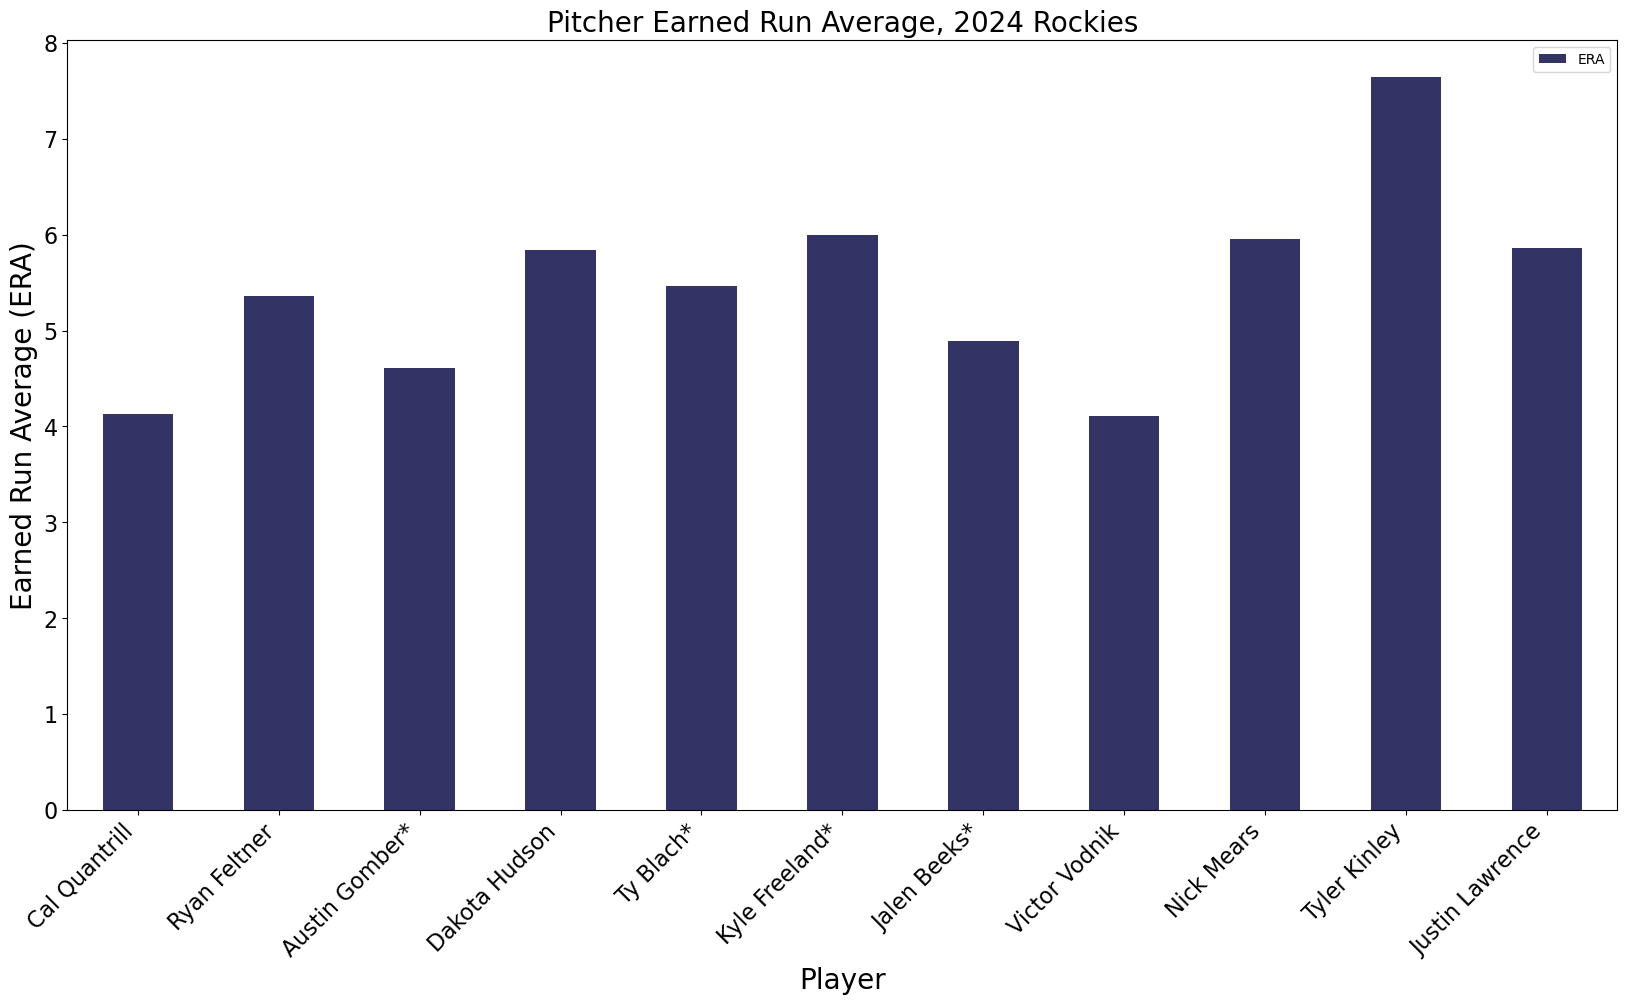

In [225]:
# Plotting the '24 pitching data in a bar chart to view players and their on ERA scores
pitching_ERA_fig2=pitching_2024_SP.plot(x="Name",
                  y="ERA",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_ERA_fig2.set_ylabel('Earned Run Average (ERA)', fontsize=20)
pitching_ERA_fig2.set_xlabel('Player', fontsize=20,)
pitching_ERA_fig2.set_title("Pitcher Earned Run Average, 2024 Rockies", fontsize=20)
pitching_ERA_fig2.set_xticklabels(pitching_ERA_fig2.get_xticklabels(), rotation=45, ha='right')



In [226]:
# Printing the mean ERA scores for the entire team for both seasons
print(f"The average Earned Run Average for 2007 team was {pitching_2007_SP['ERA'].mean():,.2f},\n" 
      f"while in 2024, the Earned Run Average for the team is {pitching_2024_SP['ERA'].mean():,.2f}.")


The average Earned Run Average for 2007 team was 3.89,
while in 2024, the Earned Run Average for the team is 5.44.


In [227]:
#Adjust values of cumulative statistics so that the statistics' value is a "per game" average. 
#This allows us to accurately compare the stats between 2007 and 2024, because they have not played an equivalent number of games.

#Adjust home runs allowed to Average home runs allowed per game
pitching_2007_pos["HR per Game"] = pitching_2007_pos["HR"]/pitching_2007_pos["G"]
pitching_2024_pos["HR per Game"] = pitching_2024_pos["HR"]/pitching_2024_pos["G"]

#Adjust total strike-outs to average # of strike-outs per game
pitching_2007_pos["SO per Game"] = pitching_2007_pos["SO"]/pitching_2007_pos["G"]
pitching_2024_pos["SO per Game"] = pitching_2024_pos["SO"]/pitching_2024_pos["G"]

#Adjust total Balls to average # of balls per game
pitching_2007_pos["BB per Game"] = pitching_2007_pos["BB"]/pitching_2007_pos["G"]
pitching_2024_pos["BB per Game"] = pitching_2024_pos["BB"]/pitching_2024_pos["G"]

#Create new value "Strike-out to Balls ratio" by dividing average strike-outs per game by average balls per game
pitching_2007_pos['SO/BB'] = pitching_2007_pos['SO per Game']/pitching_2007_pos['BB per Game']
pitching_2024_pos['SO/BB'] = pitching_2024_pos['SO per Game']/pitching_2024_pos['BB per Game']


#consolidate each seasons' dataframes to only include the data we wish to visualize
display(pitching_2007_pos[['HR', 'G', 'HR per Game', "SO per Game", "BB per Game", 'SO/BB']])
display(pitching_2024_pos[['HR', 'G', 'HR per Game', 'SO per Game', 'BB per Game', 'SO/BB']])

,HR,G,HR per Game,SO per Game,BB per Game,SO/BB
0,25.0,34.0,0.735294,4.852941,1.852941,2.619048
1,15.0,25.0,0.600000,2.440000,1.760000,1.386364
2,23.0,30.0,0.766667,3.133333,1.966667,1.593220
3,18.0,19.0,0.947368,3.947368,2.526316,1.562500
4,10.0,15.0,0.666667,4.533333,2.466667,1.837838
5,11.0,14.0,0.785714,3.071429,1.500000,2.047619
7,6.0,64.0,0.093750,0.875000,0.359375,2.434783
8,6.0,78.0,0.076923,0.743590,0.256410,2.900000
9,3.0,75.0,0.040000,0.613333,0.440000,1.393939
10,6.0,62.0,0.096774,0.467742,0.258065,1.812500


,HR,G,HR per Game,SO per Game,BB per Game,SO/BB
0,14.0,20.0,0.700000,4.850000,1.700000,2.852941
1,14.0,20.0,0.700000,4.150000,2.050000,2.024390
2,18.0,18.0,1.000000,3.722222,1.388889,2.680000
3,10.0,17.0,0.588235,2.823529,2.705882,1.043478
4,10.0,16.0,0.625000,2.000000,0.812500,2.461538
5,6.0,9.0,0.666667,3.777778,1.555556,2.428571
7,5.0,44.0,0.113636,0.863636,0.409091,2.111111
8,5.0,43.0,0.116279,1.116279,0.534884,2.086957
9,2.0,40.0,0.050000,1.400000,0.525000,2.666667
10,9.0,44.0,0.204545,1.000000,0.545455,1.833333


[Text(0, 0, 'Jeff Francis*'),
 Text(1, 0, 'Aaron Cook'),
 Text(2, 0, 'Josh Fogg'),
 Text(3, 0, 'Jason Hirsh'),
 Text(4, 0, 'Ubaldo Jiménez'),
 Text(5, 0, 'Rodrigo López'),
 Text(6, 0, 'Brian Fuentes*'),
 Text(7, 0, 'Manny Corpas'),
 Text(8, 0, 'Jeremy Affeldt*'),
 Text(9, 0, 'LaTroy Hawkins'),
 Text(10, 0, 'Jorge Julio')]

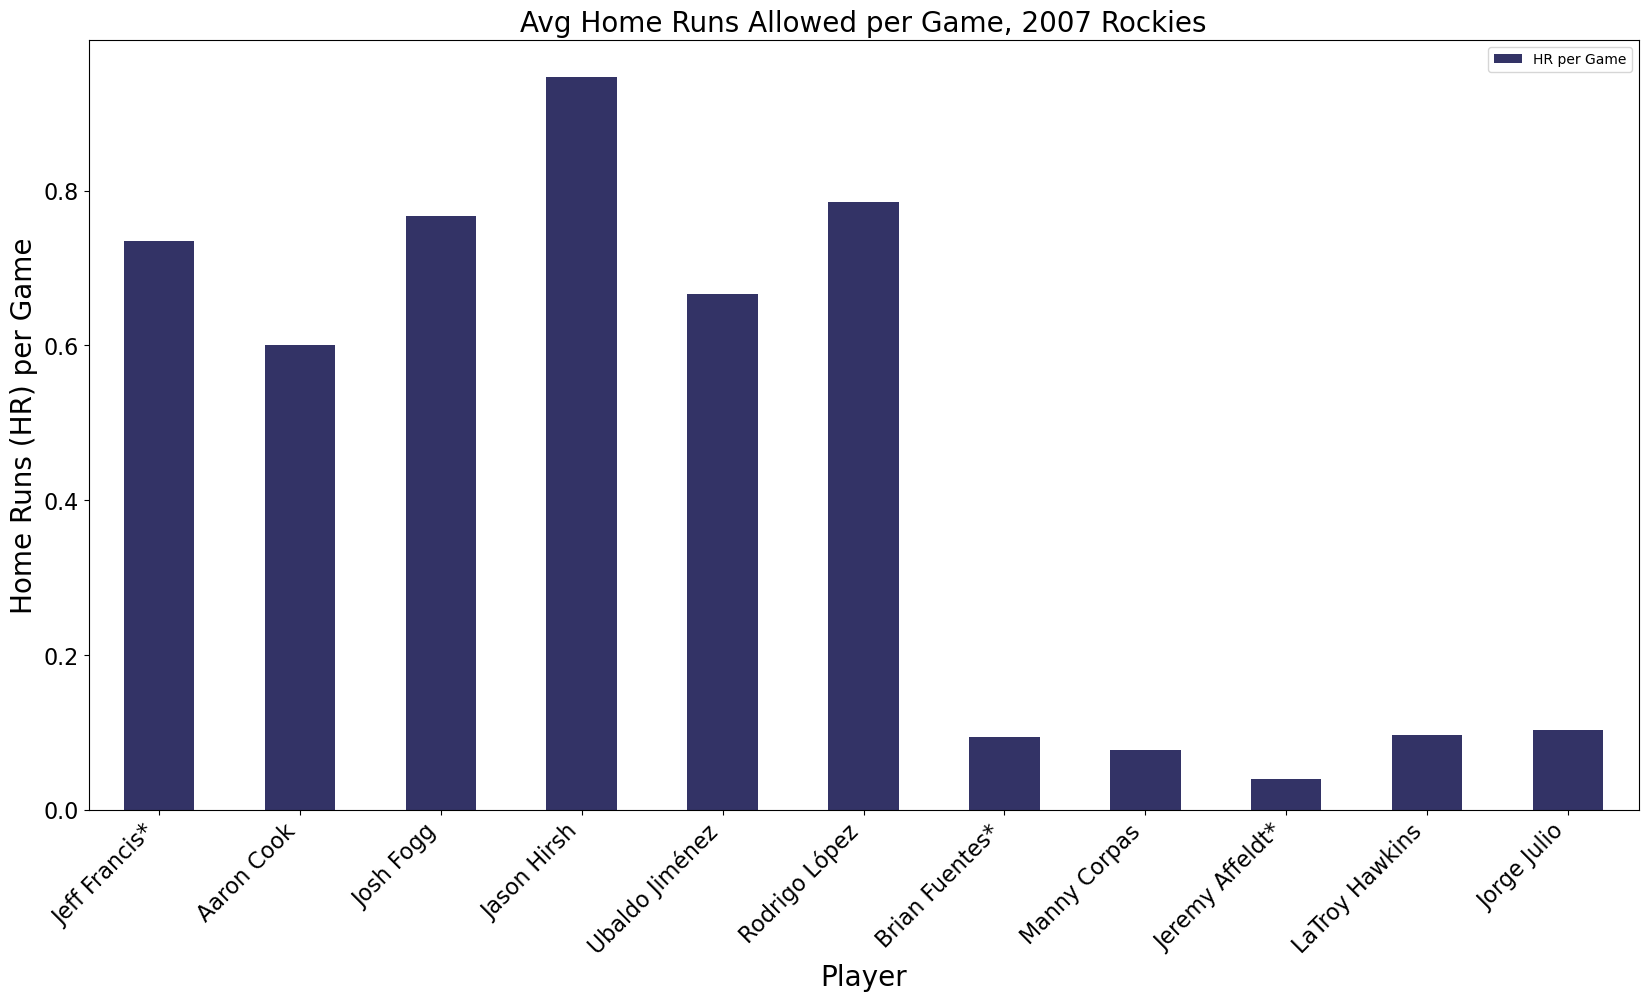

In [228]:
#create bar chart showing average home runs allowed per game by each individual player, 2007 season
pitching_HR_fig1=pitching_2007_pos.plot(x="Name",
                  y="HR per Game",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_HR_fig1.set_ylabel('Home Runs (HR) per Game', fontsize=20)
pitching_HR_fig1.set_xlabel('Player', fontsize=20,)
pitching_HR_fig1.set_title("Avg Home Runs Allowed per Game, 2007 Rockies", fontsize=20)
pitching_HR_fig1.set_xticklabels(pitching_HR_fig1.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'Ryan Feltner'),
 Text(1, 0, 'Cal Quantrill'),
 Text(2, 0, 'Austin Gomber*'),
 Text(3, 0, 'Dakota Hudson'),
 Text(4, 0, 'Ty Blach*'),
 Text(5, 0, 'Kyle Freeland*'),
 Text(6, 0, 'Jalen Beeks*'),
 Text(7, 0, 'Victor Vodnik'),
 Text(8, 0, 'Nick Mears'),
 Text(9, 0, 'Tyler Kinley'),
 Text(10, 0, 'Justin Lawrence')]

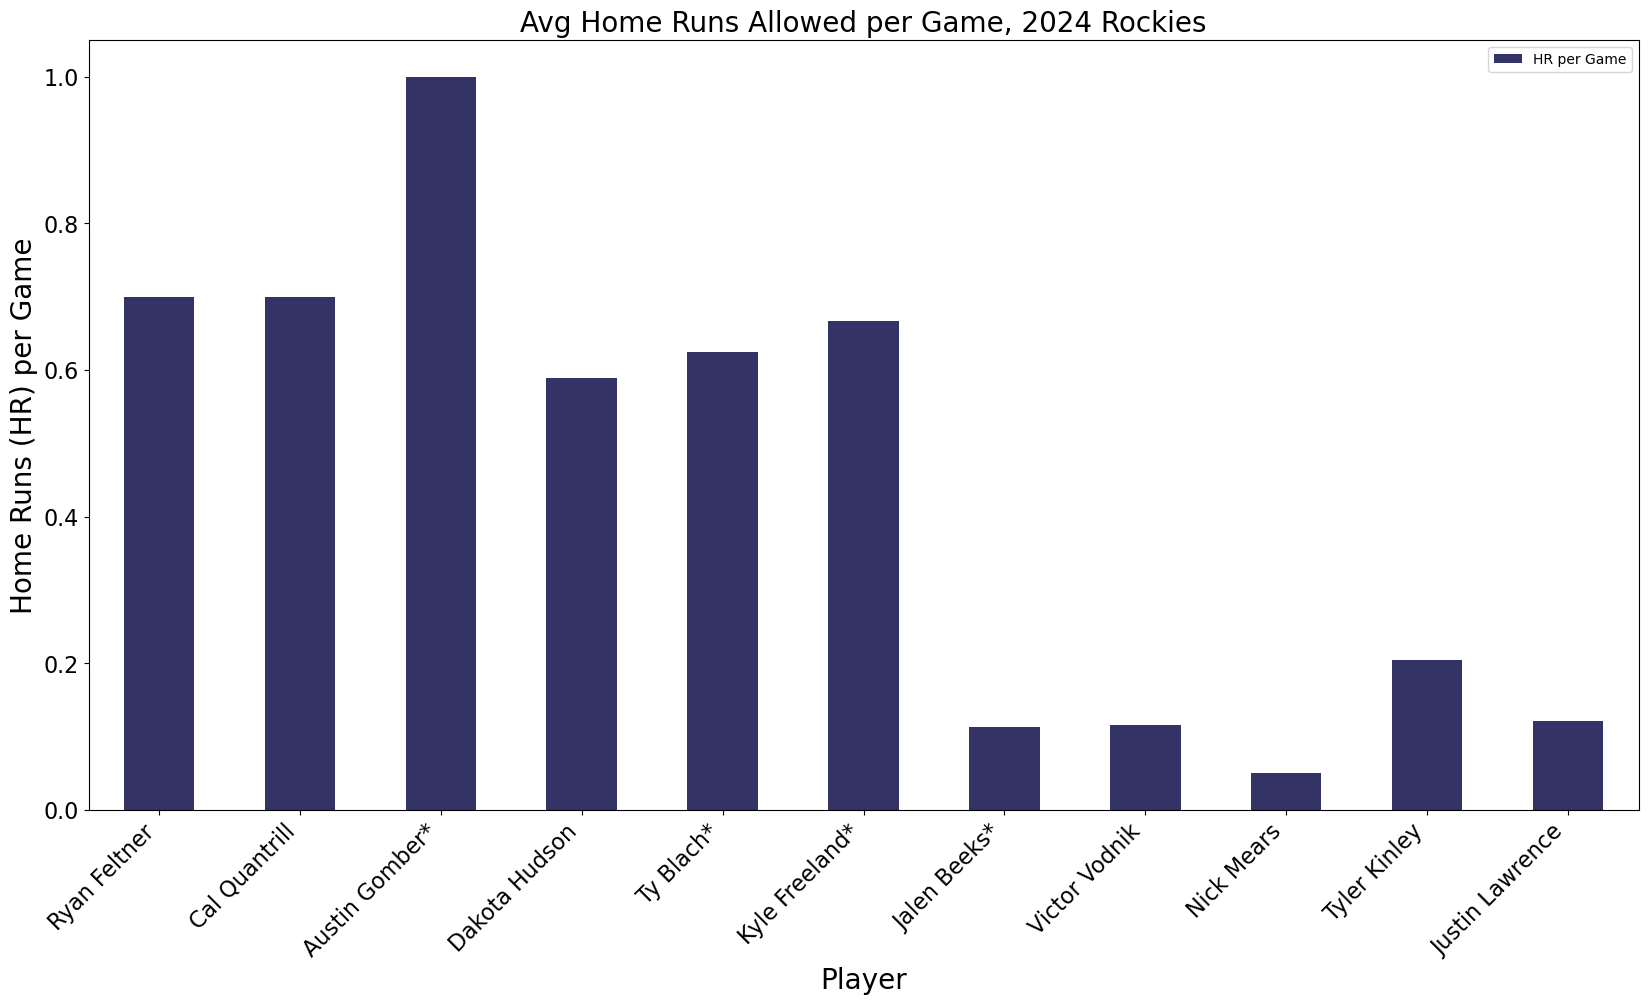

In [229]:
#create bar chart showing average home runs allowed per game by each individual player, 2024 season
pitching_HR_fig2=pitching_2024_pos.plot(x="Name",
                  y="HR per Game",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_HR_fig2.set_ylabel('Home Runs (HR) per Game', fontsize=20)
pitching_HR_fig2.set_xlabel('Player', fontsize=20,)
pitching_HR_fig2.set_title("Avg Home Runs Allowed per Game, 2024 Rockies", fontsize=20)
pitching_HR_fig2.set_xticklabels(pitching_HR_fig2.get_xticklabels(), rotation=45, ha='right')

In [230]:
# Printing the average home runs allowed per game for the entire team, by each season
print(f"The average home runs allowed for 2007 starting pitchers was {pitching_2007_pos['HR per Game'].mean():,.2f},\n" 
      f"While in 2024, the average home runs allowed for starting pitchers is {pitching_2024_pos['HR per Game'].mean():,.2f}.\n"
      f"There does not appear to be a significant difference in home runs allowed per game between the two seasons.")


The average home runs allowed for 2007 starting pitchers was 0.45,
While in 2024, the average home runs allowed for starting pitchers is 0.44.
There does not appear to be a significant difference in home runs allowed per game between the two seasons.


In [231]:
# Prepping the data to be concatnated.
# Adding a column to signal which year the data is from and making sure that both columns were added correctly.

pitching_2007_pos["year"] = 2007
pitching_2024_pos["year"] = 2024



In [232]:
# Concatnating the data on index.
pitching_combined=pd.concat([pitching_2007_pos,pitching_2024_pos]).reset_index(drop=True)
display(pitching_combined.head(30))


,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,H9,HR9,BB9,SO9,SO/W,HR per Game,SO per Game,BB per Game,SO/BB,year
0,1.0,SP,Jeff Francis*,26.0,17.0,9.0,0.654,4.22,34.0,34.0,...,9.8,1.0,2.6,6.9,2.62,0.735294,4.852941,1.852941,2.619048,2007
1,2.0,SP,Aaron Cook,28.0,8.0,7.0,0.533,4.12,25.0,25.0,...,9.7,0.8,2.4,3.3,1.39,0.600000,2.440000,1.760000,1.386364,2007
2,3.0,SP,Josh Fogg,30.0,10.0,9.0,0.526,4.94,30.0,29.0,...,10.5,1.2,3.2,5.1,1.59,0.766667,3.133333,1.966667,1.593220,2007
3,4.0,SP,Jason Hirsh,25.0,5.0,7.0,0.417,4.81,19.0,19.0,...,8.3,1.4,3.8,6.0,1.56,0.947368,3.947368,2.526316,1.562500,2007
4,5.0,SP,Ubaldo Jiménez,23.0,4.0,4.0,0.500,4.28,15.0,15.0,...,7.7,1.1,4.1,7.5,1.84,0.666667,4.533333,2.466667,1.837838,2007
5,6.0,SP,Rodrigo López,31.0,5.0,4.0,0.556,4.42,14.0,14.0,...,9.4,1.2,2.4,4.9,2.05,0.785714,3.071429,1.500000,2.047619,2007
6,7.0,CL,Brian Fuentes*,31.0,3.0,5.0,0.375,3.08,64.0,0.0,...,6.8,0.9,3.4,8.2,2.43,0.093750,0.875000,0.359375,2.434783,2007
7,8.0,RP,Manny Corpas,24.0,4.0,2.0,0.667,2.08,78.0,0.0,...,7.3,0.7,2.3,6.7,2.90,0.076923,0.743590,0.256410,2.900000,2007
8,9.0,RP,Jeremy Affeldt*,28.0,4.0,3.0,0.571,3.51,75.0,0.0,...,7.2,0.5,5.0,7.0,1.39,0.040000,0.613333,0.440000,1.393939,2007
9,10.0,RP,LaTroy Hawkins,34.0,2.0,5.0,0.286,3.42,62.0,0.0,...,8.5,1.0,2.6,4.7,1.81,0.096774,0.467742,0.258065,1.812500,2007


In [233]:
#defining a function to create a pivot table, this will be used several times

def make_pitching_pivot(g_df,ind,col,val):
    """
    Create a pivot table from a DataFrame.

    Parameters:
    g_df (grouped pandas dataframe, variable): Input DataFrame to pivot.

    ind(str): Column name to use as the index (rows) in the pivot table.

    col (str): Column name to use as the columns in the pivot table.

    val (str): Column name to use for values in the pivot table.

    Returns:
        pivot_df: Pivot table dataframe.

    """
    pivot_df=g_df.pivot(index=ind,
                        columns=col,
                        values=val)
    return pivot_df

In [234]:
# Grouping the combined data frame by position and year, including only the columns I wish to visualize in the future.
pitching_combined_mean = pitching_combined.groupby(["Pos","year"])[['ERA', 'HR per Game', 'W-L%', 'BB per Game', 'SO per Game', 'SO/BB']].mean().reset_index()


display(pitching_combined_mean)


,Pos,year,ERA,HR per Game,W-L%,BB per Game,SO per Game,SO/BB
0,CL,2007,3.080000,0.093750,0.375000,0.359375,0.875000,2.434783
1,CL,2024,4.660000,0.113636,0.600000,0.409091,0.863636,2.111111
2,RP,2007,3.235000,0.079286,0.381000,0.324826,0.671683,2.151610
3,RP,2024,5.710000,0.123009,0.516750,0.552850,1.098767,2.009239
4,SP,2007,4.465000,0.750285,0.531000,2.012098,3.663067,1.841098
5,SP,2024,5.146667,0.713317,0.286833,1.702138,3.553922,2.248487


In [235]:
# Making a dictionary to hold the rockies colors for viewing easier in charts.
colors={2007:ls.Rockies_Purple_Hex,2024:ls.Rockies_Silver_Hex}

year,2007,2024
Pos,,
CL,3.080,4.660000
RP,3.235,5.710000
SP,4.465,5.146667


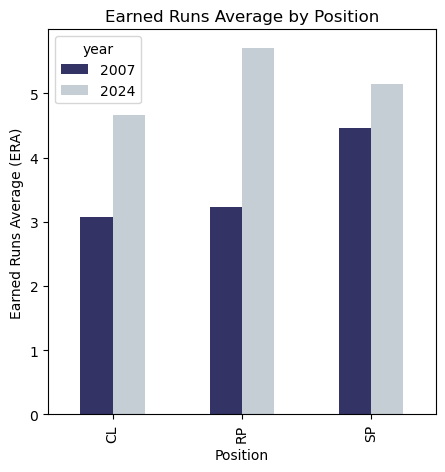

In [236]:
# create pivot table to compare ERA scores for each pitching position in both seasons
pitching_combined_ERA_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="ERA")
display(pitching_combined_ERA_piv.head())

# Creating a bar chart to show average ERA per game by position between the two years.
pitching_fig1=pitching_combined_ERA_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Earned Runs Average (ERA)",
                     title="Earned Runs Average by Position",
                     figsize=[5,5])


year,2007,2024
Pos,,
CL,0.093750,0.113636
RP,0.079286,0.123009
SP,0.750285,0.713317


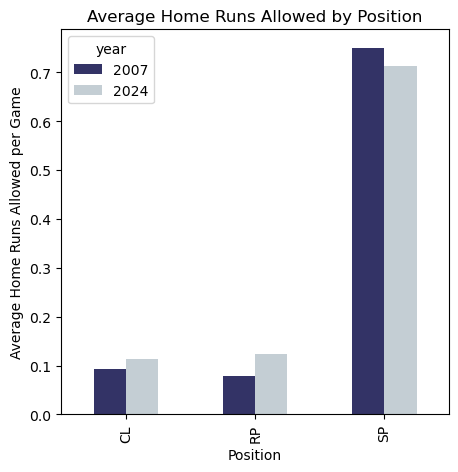

In [237]:
# create pivot table to compare average home runs allowed per game for each pitching position in both seasons
pitching_combined_HR_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="HR per Game")
display(pitching_combined_HR_piv.head())

# Creating a bar chart to show average home run per game by position between the two years.
pitching_fig2=pitching_combined_HR_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Average Home Runs Allowed per Game",
                     title="Average Home Runs Allowed by Position",
                     figsize = [5,5])

year,2007,2024
Pos,,
CL,0.375,0.600000
RP,0.381,0.516750
SP,0.531,0.286833


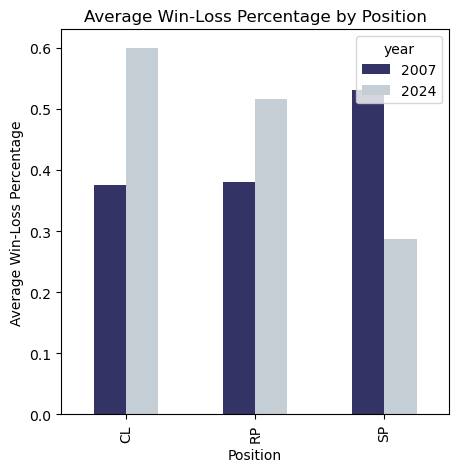

In [238]:
# create pivot table to compare win-loss averages for each pitching position in both seasons
pitching_combined_WL_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="W-L%")
display(pitching_combined_WL_piv.head())

# Creating a bar chart to show Win-loss percentage by position between the two years.
pitching_fig3=pitching_combined_WL_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Average Win-Loss Percentage",
                     title="Average Win-Loss Percentage by Position",
                     figsize = [5,5])

year,2007,2024
Pos,,
CL,0.875000,0.863636
RP,0.671683,1.098767
SP,3.663067,3.553922


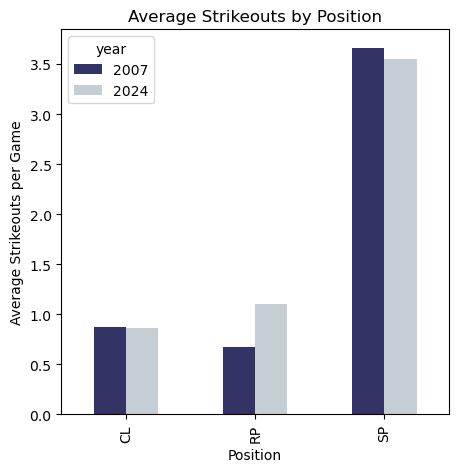

In [239]:
# create pivot table to compare average strike-outs per game for each pitching position in both seasons
pitching_combined_SO_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="SO per Game")
display(pitching_combined_SO_piv.head())

# Creating a bar chart to show average strikeouts per game by position between the two years.
pitching_fig4=pitching_combined_SO_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Average Strikeouts per Game",
                     title="Average Strikeouts by Position",
                     figsize = [5,5])

year,2007,2024
Pos,,
CL,0.359375,0.409091
RP,0.324826,0.552850
SP,2.012098,1.702138


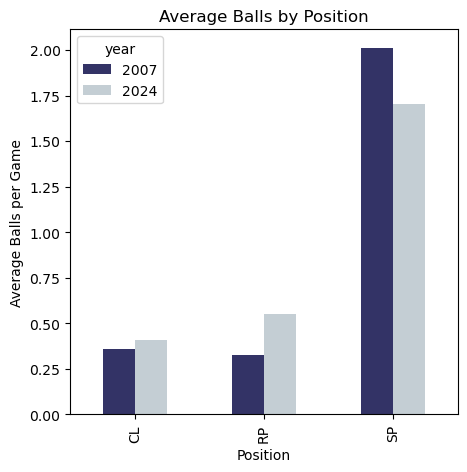

In [240]:
# create pivot table to compare average balls per game for each pitching position in both seasons
pitching_combined_BB_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="BB per Game")
display(pitching_combined_BB_piv.head())

# Creating a bar chart to show average balls per game by position between the two years.
pitching_fig5=pitching_combined_BB_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Average Balls per Game",
                     title="Average Balls by Position",
                     figsize = [5,5])

year,2007,2024
Pos,,
CL,2.434783,2.111111
RP,2.151610,2.009239
SP,1.841098,2.248487


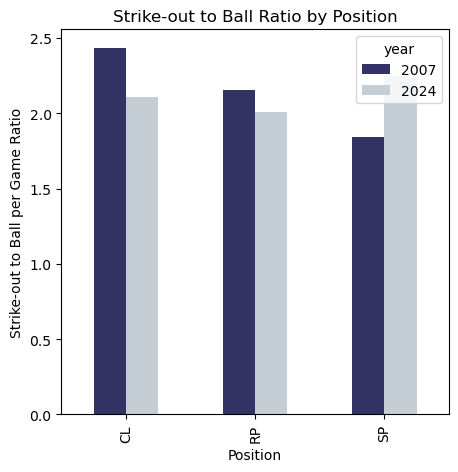

In [241]:
# create pivot table to compare average strike-out to balls ratio for each pitching position in both seasons
pitching_combined_SO_BB_piv=make_pitching_pivot(g_df=pitching_combined_mean,
                                                  ind="Pos",
                                                  col="year",
                                                  val="SO/BB")
display(pitching_combined_SO_BB_piv.head())

# Creating a bar chart to show so/bb by position between the two years.
pitching_fig6=pitching_combined_SO_BB_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Strike-out to Ball per Game Ratio",
                     title="Strike-out to Ball Ratio by Position",
                     figsize = [5,5])

In [199]:
# Saving Figures

# Creating a list holding all of the figures. Can be appended for more that get created.
figs=[pitching_fig1,pitching_fig2,pitching_fig3,pitching_fig4, pitching_fig5, pitching_fig6, pitching_WL_fig1, pitching_WL_fig2]

# Defining a function that dynamically saves the figures based on their title
def save_figure_func(f,title):
    """
    Save a figure "f" as a PNG file.

    Parameters:
        f (variable): variable that holds a figure.
        title (str): the title used for the PNG file.
            
    """
    png=".png"
    f.get_figure().savefig(f"../Test_files/Pitching_Figures/{title}{png}")

# For loop that loops through the figs list and saves each one using the save_figure_func function.
for fig in figs:
    save_figure_func(fig,fig.get_title())